In [58]:
 %matplotlib notebook

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from census import Census
from us import states


In [4]:
from config import (census_key)

In [78]:
rail_stops = pd.read_csv('C:/Users/Scott/Desktop/group_project1/CSVs\Valley_Metro_Light_Rail_Stations_View.csv')

In [79]:
rail_stops
del rail_stops['TVM'] 
del rail_stops['Image']     
del rail_stops['Image2']  
del rail_stops['BikeRacks'] 
del rail_stops['WaterFountain'] 
del rail_stops['Restroom'] 
del rail_stops['InfoDisplay'] 
del rail_stops['Em_Call']
del rail_stops['Bench'] 
del rail_stops['TrashCan']

In [80]:
rail_stops = rail_stops.loc[rail_stops["StationStatus"] == 'In Operation']

In [81]:
rail_stops

,X,Y,OBJECTID,StationId,StationName,Jurisdiction,StationStatus,POINT_X,POINT_Y,NextRide,Address
0,-112.100759,33.567397,1,1,19th Avenue / Dunlap Avenue,Phoenix,In Operation,-112.099389,33.567090,18608,1935 W Dunlap Ave
1,-111.830646,33.415107,2,35,Center Street / Main Street,Mesa,In Operation,-111.830660,33.415098,18602,26 East Main Street
2,-112.099629,33.552071,3,2,19th Avenue / Northern Avenue,Phoenix,In Operation,-112.099360,33.553190,18607,7832 N 19th Ave
3,-112.099701,33.537384,4,3,19th Avenue / Glendale Avenue,Phoenix,In Operation,-112.099329,33.538643,18606,6813 N 19th Ave
4,-111.987983,33.448170,5,21,44th Street / Washington,Phoenix,In Operation,-111.987983,33.448170,10018,4203 East Washington Street
...,...,...,...,...,...,...,...,...,...,...,...
83,-112.075240,33.447774,87,16,Jefferson / 1st Avenue,Phoenix,In Operation,-112.075202,33.447774,10013,70 South 1st Avenue
84,-111.822144,33.415064,88,36,Mesa Drive / Main Street,Mesa,In Operation,-111.822191,33.415078,18603,424 East Main Street
85,-111.974741,33.446930,89,22,50th St / Washington St,Phoenix,In Operation,-111.974741,33.446930,18716,4835 East Washingtpm Street
86,-111.802802,33.415236,90,37,Main St / Stapley Dr,Mesa,In Operation,-111.804935,33.415238,18717,1310 East Main Street


In [82]:
url = 'https://geoservices.tamu.edu/Services/ReverseGeocoding/WebService/v04_01/Rest/?'
version = 4.1
query_url = f"{url}apiKey={am_key}&version=4.10&format=json&state=az&notStore=false"


zipcode = []
city = []
address = []


for index,row in rail_stops.iterrows():
    query_api = query_url+'&lat='+str(row['Y'])+'&lon='+str(row['X'])
    response = requests.get(query_api).json()  
    zipcode.append(response['StreetAddresses'][0]['Zip'])
    city.append(response['StreetAddresses'][0]['City'])
    address.append(response['StreetAddresses'][0]['StreetAddress'])


In [83]:
rail_stops['Zipcode'] = zipcode
rail_stops

,X,Y,OBJECTID,StationId,StationName,Jurisdiction,StationStatus,POINT_X,POINT_Y,NextRide,Address,Zipcode
0,-112.100759,33.567397,1,1,19th Avenue / Dunlap Avenue,Phoenix,In Operation,-112.099389,33.567090,18608,1935 W Dunlap Ave,85021
1,-111.830646,33.415107,2,35,Center Street / Main Street,Mesa,In Operation,-111.830660,33.415098,18602,26 East Main Street,85201
2,-112.099629,33.552071,3,2,19th Avenue / Northern Avenue,Phoenix,In Operation,-112.099360,33.553190,18607,7832 N 19th Ave,85021
3,-112.099701,33.537384,4,3,19th Avenue / Glendale Avenue,Phoenix,In Operation,-112.099329,33.538643,18606,6813 N 19th Ave,85015
4,-111.987983,33.448170,5,21,44th Street / Washington,Phoenix,In Operation,-111.987983,33.448170,10018,4203 East Washington Street,85034
...,...,...,...,...,...,...,...,...,...,...,...,...
83,-112.075240,33.447774,87,16,Jefferson / 1st Avenue,Phoenix,In Operation,-112.075202,33.447774,10013,70 South 1st Avenue,85003
84,-111.822144,33.415064,88,36,Mesa Drive / Main Street,Mesa,In Operation,-111.822191,33.415078,18603,424 East Main Street,85203
85,-111.974741,33.446930,89,22,50th St / Washington St,Phoenix,In Operation,-111.974741,33.446930,18716,4835 East Washingtpm Street,85034
86,-111.802802,33.415236,90,37,Main St / Stapley Dr,Mesa,In Operation,-111.804935,33.415238,18717,1310 East Main Street,85203


In [5]:
new_csv = "../CSVs/filter_bus_1000.csv"
new_df = pd.read_csv(new_csv,encoding="utf-8", delimiter = ",")
#print(len(new_df))
#new_stops_df.head()
two_csv = "../CSVs/new_bus_2.csv"
two_df = pd.read_csv(two_csv,"utf-8", delimiter = ",")
#print(len(two_df))
#two_df.head()
three_csv = "../CSVs/filter_bus_3001-4500.csv"
three_df = pd.read_csv(three_csv,"utf-8", delimiter = ",")
#three_df.head()
#print(len(three_df))
four_csv = "../CSVs/filter_bus_4500-5535.csv"
four_df = pd.read_csv(four_csv,"utf-8", delimiter = ",")
#four_df.head()
#print(len(four_df))

In [6]:
updated_df = pd.concat([new_df, two_df, three_df, four_df])
updated_df

,NoName,X,Y,StopID,NextRide,Location,Juris,WaterFountain,ADA,Type_,...,ComputedZip,ComputedZipPlus4,Column1,Zipcode,StreetAddress,AUTO_UNIQUE_ID_2020-07-28_smavila1_new_bus_2,OBJECTID,DateUpdated,AUTO_UNIQUE_ID_2020-07-27_cceni03_filter_bus3001,AUTO_UNIQUE_ID_2020-07-28_czc5230_bus_4
0,0.0,-111.823076,33.414719,5182.0,16020.0,MESA DR & MAIN ST,Mesa,No,No,Standard,...,85201.0,7411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,-111.822766,33.415684,2982.0,16001.0,MESA DR & MAIN ST,Mesa,No,No,LINK,...,85203.0,8739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,-111.822934,33.425734,4681.0,16016.0,MESA DR & 6TH ST,Mesa,No,Yes,Standard,...,85201.0,5958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,-111.823048,33.422048,4682.0,16017.0,MESA DR & UNIVERSITY DR,Mesa,No,Yes,Standard,...,85201.0,6726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,-111.823069,33.416883,4679.0,16019.0,MESA DR & 1ST ST,Mesa,No,Yes,Standard,...,85201.0,6707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,NaN,-111.840096,33.412555,5069.0,NaN,COUNTRY CLUB DR & DANA AVE,Mesa,NaN,NaN,Standard,...,85210.0,1225.0,5530.0,,,NaN,NaN,NaN,NaN,1031.0
1031,NaN,-111.930397,33.458342,30430.0,NaN,E. Continental Dr. & N. McAllister Ave.,Tempe,NaN,NaN,Standard,...,85281.0,1057.0,5531.0,,,NaN,NaN,NaN,NaN,1032.0
1032,NaN,-111.900373,33.422489,NaN,NaN,S. Smith St. & E. University Dr.,Tempe,NaN,NaN,Standard,...,85281.0,4681.0,5532.0,,,NaN,NaN,NaN,NaN,1033.0
1033,NaN,-112.059740,33.299619,40272.0,NaN,Desert Foothills Pkwy & S 16013,Phoenix,NaN,NaN,Standard,...,85048.0,8435.0,5533.0,,,NaN,NaN,NaN,NaN,1034.0


In [7]:
#Deleted extra columns
final_bus_df = updated_df.drop(['WaterFountain','ADA','TransactionId','Column1', 'Zipcode', 'StreetAddress', 'AUTO_UNIQUE_ID_2020-07-28_smavila1_new_bus_2','OBJECTID','AUTO_UNIQUE_ID_2020-07-28_czc5230_bus_4','AUTO_UNIQUE_ID_2020-07-27_cceni03_filter_bus3001', 'DateUpdated','Routes', 'Zip', 'Type_', 'Direction','AUTO_UNIQUE_ID_2020-07-27_pwewiora08_filter_bus_1000','NoName','City', 'Address', 'TimeTaken','Source','ComputedAPN', 'State', 'UpdatedReverseGeocoding', 'ErrorMessage','ATIS_ID','NextRide', 'Version'], axis=1)
#Dropped duplicates in case there was overlap
final_bus_df.drop_duplicates(keep=False,inplace=True)

final_bus_df

,X,Y,StopID,Location,Juris,Long,Lat,ComputedStreetAddress,ComputedCity,ComputedState,ComputedZip,ComputedZipPlus4
0,-111.823076,33.414719,5182.0,MESA DR & MAIN ST,Mesa,-111.823076,33.414719,315 E MAIN ST,Globe,AZ,85201.0,7411.0
1,-111.822766,33.415684,2982.0,MESA DR & MAIN ST,Mesa,-111.822766,33.415684,410 E MAIN ST,Mesa,AZ,85203.0,8739.0
2,-111.822934,33.425734,4681.0,MESA DR & 6TH ST,Mesa,-111.822934,33.425734,520 N MESA DR,Globe,AZ,85201.0,5958.0
3,-111.823048,33.422048,4682.0,MESA DR & UNIVERSITY DR,Mesa,-111.823048,33.422048,310 N MESA DR,Globe,AZ,85201.0,6726.0
4,-111.823069,33.416883,4679.0,MESA DR & 1ST ST,Mesa,-111.823069,33.416883,307 E 1ST ST,Globe,AZ,85201.0,6707.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,-111.840096,33.412555,5069.0,COUNTRY CLUB DR & DANA AVE,Mesa,-111.840096,33.412555,126 S COUNTRY CLUB DR,Apache Junction,AZ,85210.0,1225.0
1031,-111.930397,33.458342,30430.0,E. Continental Dr. & N. McAllister Ave.,Tempe,-111.930397,33.458342,515 E CONTINENTAL DR,Mesa,AZ,85281.0,1057.0
1032,-111.900373,33.422489,NaN,S. Smith St. & E. University Dr.,Tempe,-111.900373,33.422489,2010 E UNIVERSITY DR,Mesa,AZ,85281.0,4681.0
1033,-112.059740,33.299619,40272.0,Desert Foothills Pkwy & S 16013,Phoenix,-112.059740,33.299619,16013 S DESERT FOOTHILLS PKWY,Phoenix,AZ,85048.0,8435.0


In [8]:
final_bus_df = final_bus_df.rename(columns={"ComputedZip": "Zipcode",
                                      })
final_bus_df

,X,Y,StopID,Location,Juris,Long,Lat,ComputedStreetAddress,ComputedCity,ComputedState,Zipcode,ComputedZipPlus4
0,-111.823076,33.414719,5182.0,MESA DR & MAIN ST,Mesa,-111.823076,33.414719,315 E MAIN ST,Globe,AZ,85201.0,7411.0
1,-111.822766,33.415684,2982.0,MESA DR & MAIN ST,Mesa,-111.822766,33.415684,410 E MAIN ST,Mesa,AZ,85203.0,8739.0
2,-111.822934,33.425734,4681.0,MESA DR & 6TH ST,Mesa,-111.822934,33.425734,520 N MESA DR,Globe,AZ,85201.0,5958.0
3,-111.823048,33.422048,4682.0,MESA DR & UNIVERSITY DR,Mesa,-111.823048,33.422048,310 N MESA DR,Globe,AZ,85201.0,6726.0
4,-111.823069,33.416883,4679.0,MESA DR & 1ST ST,Mesa,-111.823069,33.416883,307 E 1ST ST,Globe,AZ,85201.0,6707.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,-111.840096,33.412555,5069.0,COUNTRY CLUB DR & DANA AVE,Mesa,-111.840096,33.412555,126 S COUNTRY CLUB DR,Apache Junction,AZ,85210.0,1225.0
1031,-111.930397,33.458342,30430.0,E. Continental Dr. & N. McAllister Ave.,Tempe,-111.930397,33.458342,515 E CONTINENTAL DR,Mesa,AZ,85281.0,1057.0
1032,-111.900373,33.422489,NaN,S. Smith St. & E. University Dr.,Tempe,-111.900373,33.422489,2010 E UNIVERSITY DR,Mesa,AZ,85281.0,4681.0
1033,-112.059740,33.299619,40272.0,Desert Foothills Pkwy & S 16013,Phoenix,-112.059740,33.299619,16013 S DESERT FOOTHILLS PKWY,Phoenix,AZ,85048.0,8435.0


In [9]:
c = Census(census_key, year=2018)

In [11]:
census_data

[{'NAME': 'ZCTA5 43964',
  'B01003_001E': 8642.0,
  'B08301_010E': 18.0,
  'zip code tabulation area': '43964'},
 {'NAME': 'ZCTA5 28216',
  'B01003_001E': 51116.0,
  'B08301_010E': 742.0,
  'zip code tabulation area': '28216'},
 {'NAME': 'ZCTA5 28277',
  'B01003_001E': 71605.0,
  'B08301_010E': 1240.0,
  'zip code tabulation area': '28277'},
 {'NAME': 'ZCTA5 28278',
  'B01003_001E': 27286.0,
  'B08301_010E': 155.0,
  'zip code tabulation area': '28278'},
 {'NAME': 'ZCTA5 28303',
  'B01003_001E': 29414.0,
  'B08301_010E': 131.0,
  'zip code tabulation area': '28303'},
 {'NAME': 'ZCTA5 28314',
  'B01003_001E': 58110.0,
  'B08301_010E': 71.0,
  'zip code tabulation area': '28314'},
 {'NAME': 'ZCTA5 28330',
  'B01003_001E': 444.0,
  'B08301_010E': 0.0,
  'zip code tabulation area': '28330'},
 {'NAME': 'ZCTA5 28347',
  'B01003_001E': 2329.0,
  'B08301_010E': 20.0,
  'zip code tabulation area': '28347'},
 {'NAME': 'ZCTA5 28351',
  'B01003_001E': 4698.0,
  'B08301_010E': 0.0,
  'zip code tabu

In [10]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B08301_010E"),
                          {'for': 'zip code tabulation area:*'})

In [12]:
census_pd = pd.DataFrame(census_data)

In [13]:
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B08301_010E": "Public Transportation Use",
                                      "zip code tabulation area": "Zipcode"})

census_pd = census_pd.fillna(0)

In [14]:
print(len(census_pd))
census_pd.head()

33120


,NAME,Population,Public Transportation Use,Zipcode
0,ZCTA5 43964,8642.0,18.0,43964
1,ZCTA5 28216,51116.0,742.0,28216
2,ZCTA5 28277,71605.0,1240.0,28277
3,ZCTA5 28278,27286.0,155.0,28278
4,ZCTA5 28303,29414.0,131.0,28303


In [15]:
census_pd['Zipcode'] = census_pd['Zipcode'].transform(float)

In [16]:
bus_census = pd.merge(final_bus_df, census_pd, how='left', on=['Zipcode'])
bus_census

,X,Y,StopID,Location,Juris,Long,Lat,ComputedStreetAddress,ComputedCity,ComputedState,Zipcode,ComputedZipPlus4,NAME,Population,Public Transportation Use
0,-111.823076,33.414719,5182.0,MESA DR & MAIN ST,Mesa,-111.823076,33.414719,315 E MAIN ST,Globe,AZ,85201.0,7411.0,ZCTA5 85201,51519.0,791.0
1,-111.822766,33.415684,2982.0,MESA DR & MAIN ST,Mesa,-111.822766,33.415684,410 E MAIN ST,Mesa,AZ,85203.0,8739.0,ZCTA5 85203,39069.0,725.0
2,-111.822934,33.425734,4681.0,MESA DR & 6TH ST,Mesa,-111.822934,33.425734,520 N MESA DR,Globe,AZ,85201.0,5958.0,ZCTA5 85201,51519.0,791.0
3,-111.823048,33.422048,4682.0,MESA DR & UNIVERSITY DR,Mesa,-111.823048,33.422048,310 N MESA DR,Globe,AZ,85201.0,6726.0,ZCTA5 85201,51519.0,791.0
4,-111.823069,33.416883,4679.0,MESA DR & 1ST ST,Mesa,-111.823069,33.416883,307 E 1ST ST,Globe,AZ,85201.0,6707.0,ZCTA5 85201,51519.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,-111.840096,33.412555,5069.0,COUNTRY CLUB DR & DANA AVE,Mesa,-111.840096,33.412555,126 S COUNTRY CLUB DR,Apache Junction,AZ,85210.0,1225.0,ZCTA5 85210,40919.0,769.0
5530,-111.930397,33.458342,30430.0,E. Continental Dr. & N. McAllister Ave.,Tempe,-111.930397,33.458342,515 E CONTINENTAL DR,Mesa,AZ,85281.0,1057.0,ZCTA5 85281,65283.0,2303.0
5531,-111.900373,33.422489,NaN,S. Smith St. & E. University Dr.,Tempe,-111.900373,33.422489,2010 E UNIVERSITY DR,Mesa,AZ,85281.0,4681.0,ZCTA5 85281,65283.0,2303.0
5532,-112.059740,33.299619,40272.0,Desert Foothills Pkwy & S 16013,Phoenix,-112.059740,33.299619,16013 S DESERT FOOTHILLS PKWY,Phoenix,AZ,85048.0,8435.0,ZCTA5 85048,35252.0,379.0


In [17]:
del bus_census['NAME'] 
bus_census

,X,Y,StopID,Location,Juris,Long,Lat,ComputedStreetAddress,ComputedCity,ComputedState,Zipcode,ComputedZipPlus4,Population,Public Transportation Use
0,-111.823076,33.414719,5182.0,MESA DR & MAIN ST,Mesa,-111.823076,33.414719,315 E MAIN ST,Globe,AZ,85201.0,7411.0,51519.0,791.0
1,-111.822766,33.415684,2982.0,MESA DR & MAIN ST,Mesa,-111.822766,33.415684,410 E MAIN ST,Mesa,AZ,85203.0,8739.0,39069.0,725.0
2,-111.822934,33.425734,4681.0,MESA DR & 6TH ST,Mesa,-111.822934,33.425734,520 N MESA DR,Globe,AZ,85201.0,5958.0,51519.0,791.0
3,-111.823048,33.422048,4682.0,MESA DR & UNIVERSITY DR,Mesa,-111.823048,33.422048,310 N MESA DR,Globe,AZ,85201.0,6726.0,51519.0,791.0
4,-111.823069,33.416883,4679.0,MESA DR & 1ST ST,Mesa,-111.823069,33.416883,307 E 1ST ST,Globe,AZ,85201.0,6707.0,51519.0,791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,-111.840096,33.412555,5069.0,COUNTRY CLUB DR & DANA AVE,Mesa,-111.840096,33.412555,126 S COUNTRY CLUB DR,Apache Junction,AZ,85210.0,1225.0,40919.0,769.0
5530,-111.930397,33.458342,30430.0,E. Continental Dr. & N. McAllister Ave.,Tempe,-111.930397,33.458342,515 E CONTINENTAL DR,Mesa,AZ,85281.0,1057.0,65283.0,2303.0
5531,-111.900373,33.422489,NaN,S. Smith St. & E. University Dr.,Tempe,-111.900373,33.422489,2010 E UNIVERSITY DR,Mesa,AZ,85281.0,4681.0,65283.0,2303.0
5532,-112.059740,33.299619,40272.0,Desert Foothills Pkwy & S 16013,Phoenix,-112.059740,33.299619,16013 S DESERT FOOTHILLS PKWY,Phoenix,AZ,85048.0,8435.0,35252.0,379.0


<IPython.core.display.Javascript object>


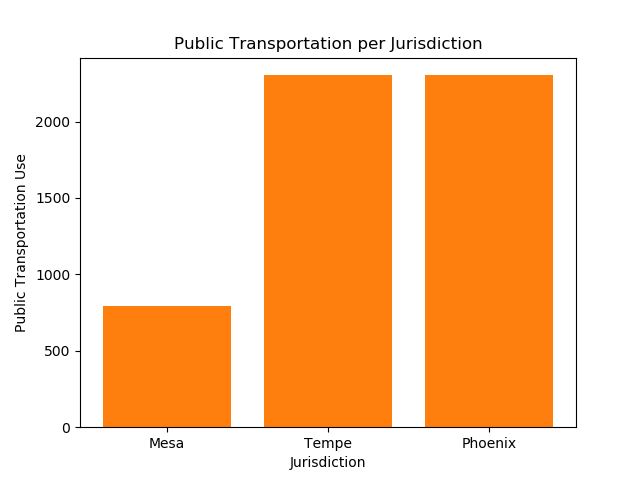

In [49]:
x_values = bus_census['Juris']
y_values = bus_census['Public Transportation Use']
plt.bar(x_values, y_values)
plt.bar(bus_census['Juris'], bus_census['Public Transportation Use'])
plt.title("Public Transportation per Jurisdiction")
plt.xlabel("Jurisdiction")
plt.ylabel("Public Transportation Use")
plt.show()

In [77]:
plt.savefig("../SO/PublicTransportPop.png")
plt.show()

<IPython.core.display.Javascript object>


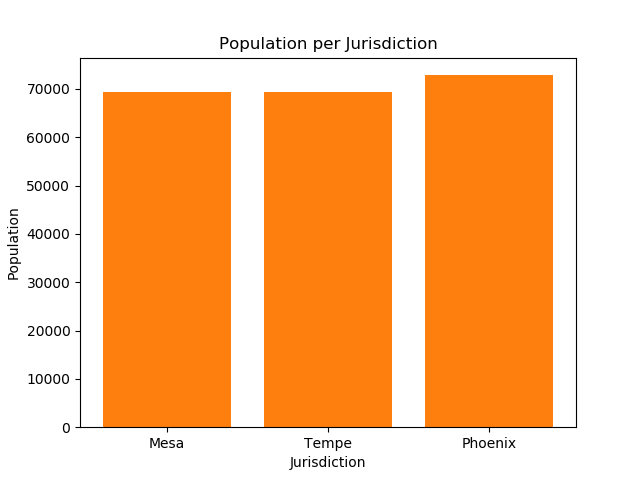

In [18]:
x_values = bus_census['Juris']
y_values = bus_census['Population']
plt.bar(x_values, y_values)
plt.bar(bus_census['Juris'], bus_census['Population'])
plt.title("Population per Jurisdiction")
plt.xlabel("Jurisdiction")
plt.ylabel("Population")
plt.show()

In [40]:
plt.savefig("../SO/JurisdictionPop.png")
plt.show()

In [53]:
bus_rider_csv = "../PW_CSVs/bus_riders_SO.csv"
new_bus_rider_df = pd.read_csv(bus_rider_csv,encoding="utf-8", delimiter = ",")
new_bus_rider_df.head()

,City,2016,2017,2018,2019
0,Mesa,"44,687","62,702","78,623","33,074"
1,Phoenix,"331,798","564,782","721,403","297,178"
2,Tempe,"43,899","60,741","72,676","29,939"


In [54]:
az_pop_data_csv = "../PW_CSVs/ariz_pop_data10-19.csv"
new_az_pop_data_df = pd.read_csv(az_pop_data_csv,encoding="utf-8", delimiter = ",")
new_az_pop_data_df

,City,2016,2017,2018,2019
0,Mesa,"490,695","500,021","507,945","518,012"
1,Phoenix,"1,612,199","1,633,560","1,654,675","1,680,992"
2,Tempe,"184,877","185,792","191,746","195,805"


In [55]:
combined_rider_pop_data = pd.merge(new_bus_rider_df, new_az_pop_data_df, on="City")
combined_rider_pop_data.head()

,City,2016_x,2017_x,2018_x,2019_x,2016_y,2017_y,2018_y,2019_y
0,Mesa,"44,687","62,702","78,623","33,074","490,695","500,021","507,945","518,012"
1,Phoenix,"331,798","564,782","721,403","297,178","1,612,199","1,633,560","1,654,675","1,680,992"
2,Tempe,"43,899","60,741","72,676","29,939","184,877","185,792","191,746","195,805"


In [56]:
combined_rider_pop_data_df = combined_rider_pop_data.rename(columns={"2016_x": "2016 Ridership",
                                                                          "2017_x": "2017 Ridership",
                                                                          "2018_x": "2018 Ridership",
                                                                          "2019_x": "2019 Ridership",
                                                                          "2016_y": "2016 Population",
                                                                          "2017_y": "2017 Population",
                                                                          "2018_y": "2018 Population",
                                                                          "2019_y": "2019 Population"
                                                                         })
combined_rider_pop_data_df

,City,2016 Ridership,2017 Ridership,2018 Ridership,2019 Ridership,2016 Population,2017 Population,2018 Population,2019 Population
0,Mesa,"44,687","62,702","78,623","33,074","490,695","500,021","507,945","518,012"
1,Phoenix,"331,798","564,782","721,403","297,178","1,612,199","1,633,560","1,654,675","1,680,992"
2,Tempe,"43,899","60,741","72,676","29,939","184,877","185,792","191,746","195,805"


<IPython.core.display.Javascript object>


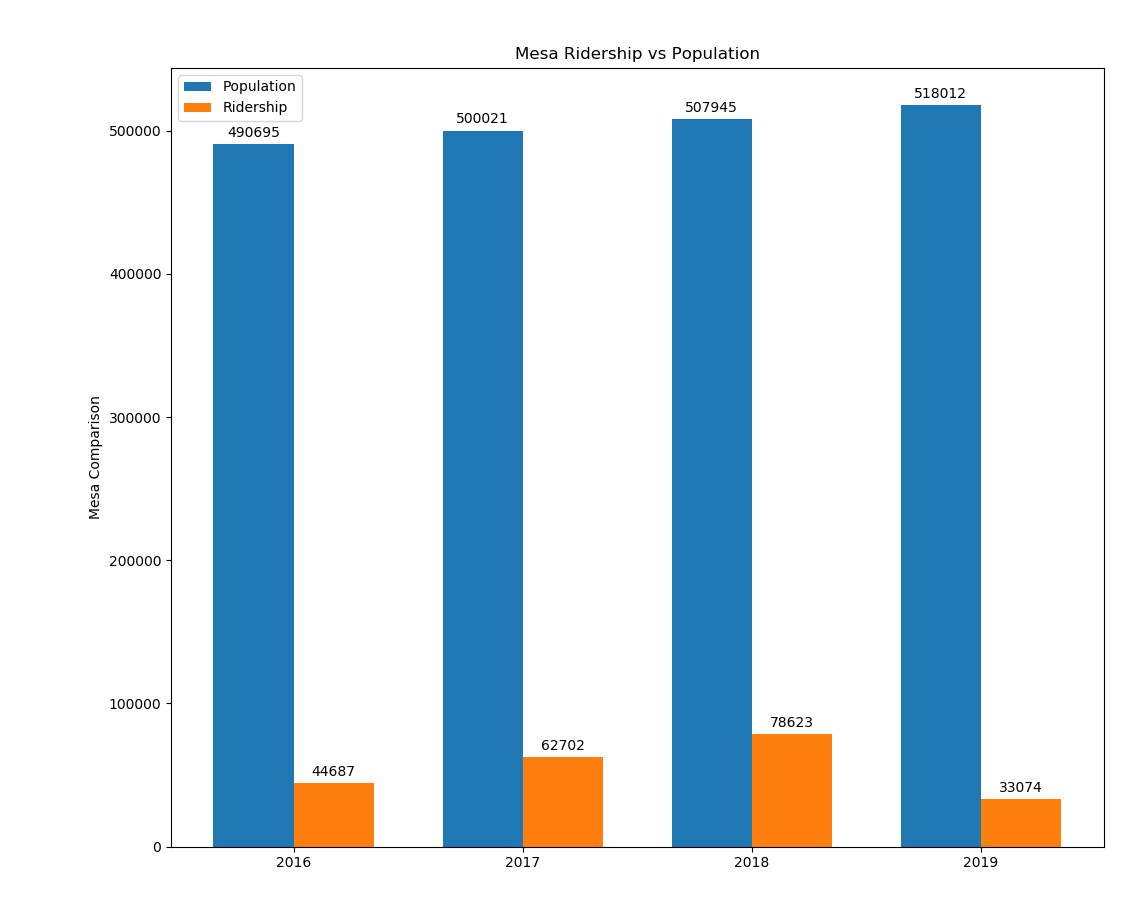

In [62]:
labels = ['2016', '2017', '2018', '2019']
population_means = [490695, 500021, 507945, 518012]
ridership_means = [44687, 62702, 78623, 33074]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, population_means, width, label='Population')
rects2 = ax.bar(x + width/2, ridership_means, width, label='Ridership')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mesa Comparison')
ax.set_title('Mesa Ridership vs Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [73]:
plt.savefig("../SO/MesaPopRidership.png")
plt.show()

<IPython.core.display.Javascript object>


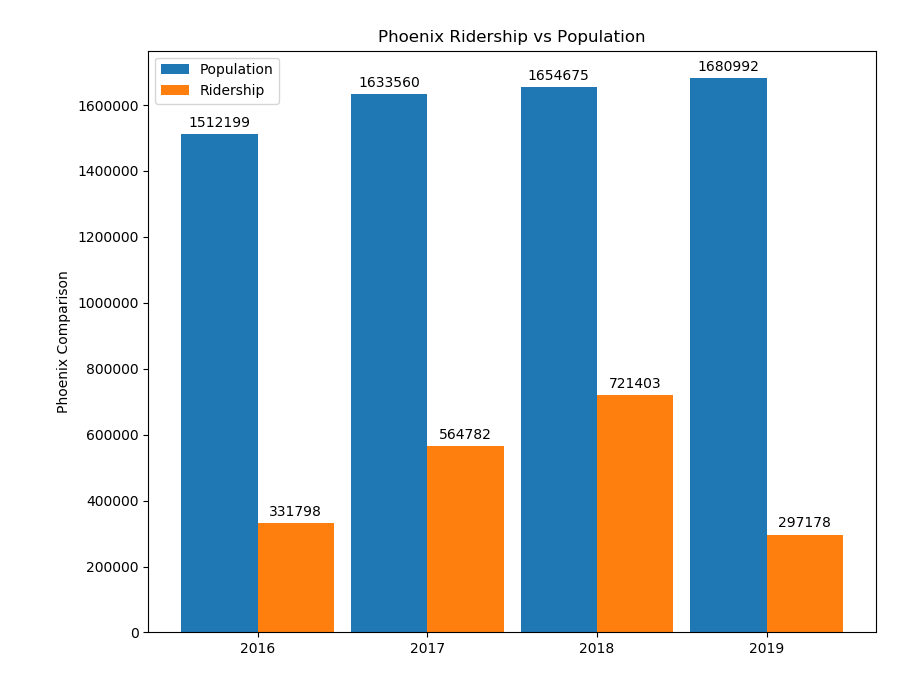

In [71]:
labels = ['2016', '2017', '2018', '2019']
population_means = [1512199, 1633560, 1654675, 1680992]
ridership_means = [331798, 564782, 721403, 297178]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, population_means, width, label='Population')
rects2 = ax.bar(x + width/2, ridership_means, width, label='Ridership')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Phoenix Comparison')
ax.set_title('Phoenix Ridership vs Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [75]:
plt.savefig("../SO/PhoenixPopRidership.png")
plt.show()

<IPython.core.display.Javascript object>


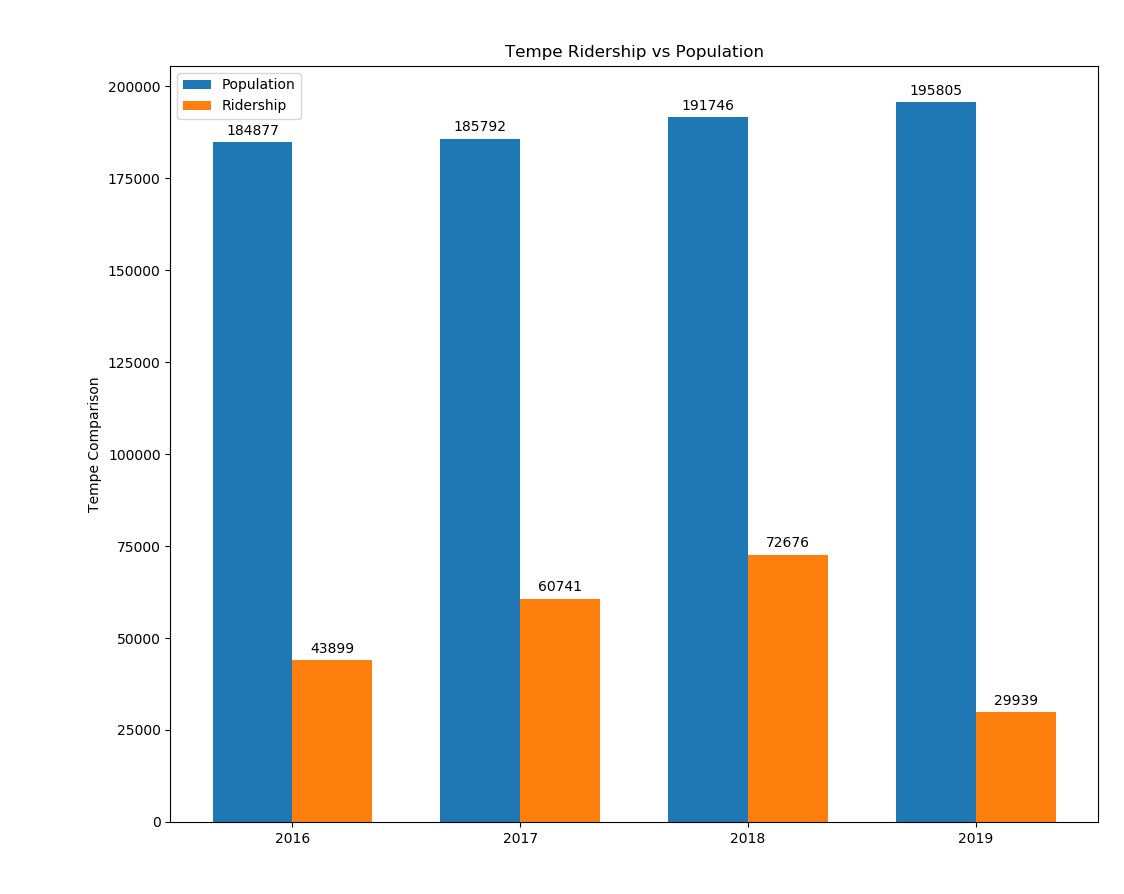

In [70]:
labels = ['2016', '2017', '2018', '2019']
population_means = [184877, 185792, 191746, 195805]
ridership_means = [43899, 60741, 72676, 29939]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, population_means, width, label='Population')
rects2 = ax.bar(x + width/2, ridership_means, width, label='Ridership')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tempe Comparison')
ax.set_title('Tempe Ridership vs Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [76]:
plt.savefig("../SO/TempePopRidership.png")
plt.show()